<font color='steelblue' size=5><b>Комментарий ревьюера</b></font>

<font color='steelblue'>Привет, Алексей! Меня зовут Михаил Костин, я буду проверять этот проект. Спасибо за проделанную работу! Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на "вы".</font>

<font color='steelblue'>Я буду использовать различные цвета и знаки, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='steelblue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='darkorange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание или что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).</font>

<font color='crimson'>❌ и красный текст - есть аспекты, с которыми принять проект в данной итерации не получится</font>

---

<font color='steelblue'>Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям - **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения.
Например, так: <b>Комментарий студента</b>

Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. 

<b>Давай смотреть, что получилось!</b></font> 

# Учебный Проект → «ГлавРосГосНефть»

## Описание Проекта

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note</span>
    <p class="mb-0">В коде использую <code>display()</code> намеренно, потомучто это однозначно даёт понять что планируется вывод / печать результатов. 👌</p>
</div>

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.
Шаги для выбора локации обычно такие:

1. В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
2. Строят модель для предсказания объёма запасов в новых скважинах;
3. Выбирают скважины с самыми высокими оценками значений;
4. Определяют регион с максимальной суммарной прибылью отобранных скважин;

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

### Условия задачи

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузите и подготовьте данные. Поясните порядок действий.

Импортируем библиотеки 🎒

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState


from matplotlib import rcParams

from math import sqrt

from statistics import mean
from statistics import stdev

from scipy.stats import t
from scipy.stats import bootstrap

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Хорошо, есть описание, импорты в одном месте.
</font> 

Настроим вид графиков по+красоте ✨

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
                # 'font.sans-serif': [
                #     'Helvetica',
                #     'Verdana',
                #     'Tahoma',
                #     'Trebuchet MS',
                #     'Arial',
                #     'Chevin'
                #     ]
                }

# rcParams.update(custom_params)

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Действительно красиво :)
</font> 

Константы.

In [4]:
random_seed = 108108108
random_np = RandomState(128) 
dpi_k = custom_params['figure.dpi'] / rcParams['figure.dpi']
px = 1/custom_params['figure.dpi']

Функции.

In [5]:
def to_px(size_px):
    px_density = int(
        round(
            size_px * px * dpi_k
        )
    )
    return px_density

In [6]:
def plot_hist(geo_data, title='Histogram', custom_params=custom_params):
    with mpl.rc_context(custom_params):
        fig, axs = plt.subplots(
            nrows=1,
            ncols=4,
            figsize=(
                to_px(1024), to_px(256)),
            tight_layout=True
        )
        
        n_bins = int(len(geo_data.index) / 100)
        
        for n in range(4):
            col_name = geo_data.columns[n]
            axs[n].hist(geo_data[col_name], bins=n_bins, color='forestgreen')
            axs[n].set_title(col_name)
        
        fig.suptitle(title, fontsize=16)

        plt.show()

In [7]:
def baisic_df_info(data_df, title='Basic Info'):
    print(title, end='\n\n')
    print('Дубликатов:',
             len(data_df.loc[data_df.duplicated()].index),
          end='\n\n'
     )
    
    display(
        data_df.info(),
        data_df.sample(5),
        data_df.describe(),
    )

In [8]:
def predict_info(target_valid, target_pred, region_name):
    print('Регион', region_name, end='\n\n')
    print('Предсказания запасов нефти:')
    print(
        '\tсреднее',
        round(np.mean(target_pred), 5)
    )
    print(
        '\tмедиана',
        round(np.median(target_pred), 5)
    )
    print()
    print(
        'RMSE модели',
        sqrt(
            mean_squared_error(
                target_valid,
                target_pred
            )
        )
    )

Загрузим данные.

In [9]:
try:
    geo_data_zero = pd.read_csv(
        './datasets/geo_data_0.csv',
        index_col='id',
    )
    geo_data_one = pd.read_csv(
        './datasets/geo_data_1.csv',
        index_col='id',
    )
    geo_data_two = pd.read_csv(
        './datasets/geo_data_2.csv',
        index_col='id',
    )
    
except FileNotFoundError:
    geo_data_zero = pd.read_csv(
        'https://code.s3.yandex.net/datasets/geo_data_0.csv',
        index_col='id',
    )
    geo_data_one = pd.read_csv(
        'https://code.s3.yandex.net/datasets/geo_data_1.csv',
        index_col='id',
    )
    geo_data_two = pd.read_csv(
        'https://code.s3.yandex.net/datasets/geo_data_2.csv',
        index_col='id',
    )
    print('FYI datasets loaded via url')

Посмотрим на данные 📊

- `id` — уникальный идентификатор скважины
- `f0`, `f1`, `f2` — три значимых признака точек
- `product` — объём запасов в скважине, (тыс. баррелей)

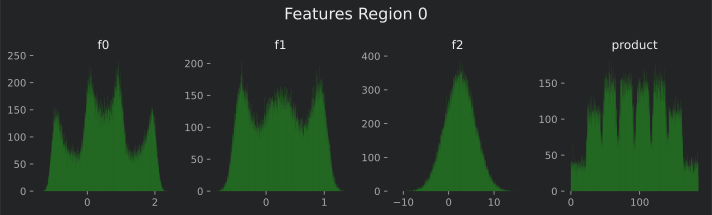

In [10]:
plot_hist(geo_data_zero, title='Features Region 0')

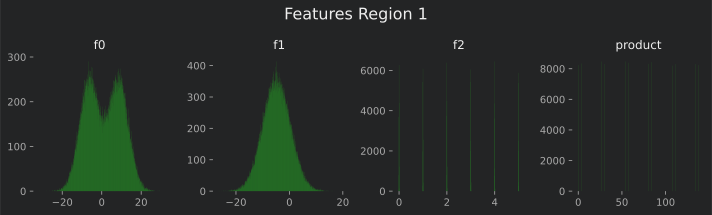

In [11]:
plot_hist(geo_data_one, title='Features Region 1')

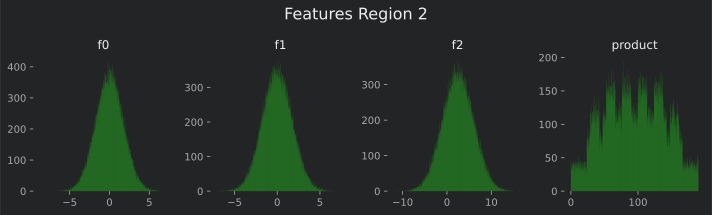

In [12]:
plot_hist(geo_data_two, title='Features Region 2')

In [13]:
baisic_df_info(geo_data_zero, 'Region 0')

Region 0

Дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


None

f0        f1        f2     product
id                                             
ysDcB  0.469024 -0.339293 -0.608300  106.432294
fZ9oi  0.723884 -0.508702  3.421765  154.114835
0f584 -0.514391  0.784055  3.455917   86.898475
dxkCY  0.086984 -0.151264 -1.208107  100.250037
ht1jv  0.730615  0.752234  2.996113   30.118861

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

In [14]:
baisic_df_info(geo_data_one, 'Region 1')

Region 1

Дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


None

f0        f1        f2     product
id                                              
t7yQn -10.808386 -5.580392  0.994408   30.132364
yMvdI  -3.822191 -1.840962  3.998174  110.992147
QNG2H  11.087016 -4.621199  4.993015  134.766305
h4Tvz   0.801664  1.046163  2.994870   80.859783
fZuSM  -4.704281 -7.864375  5.000867  134.766305

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408

In [15]:
baisic_df_info(geo_data_two, 'Region 2')

Region 2

Дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


None

f0        f1        f2     product
id                                             
Tmwnq  1.170941  2.228795  0.067246   91.016133
uaXHX  2.276987 -0.315952  3.234043  112.494658
QL2Po -0.316771  0.664461  4.059903  111.242979
gNrm2 -1.793433 -2.201092 -1.192833  127.652400
yh17W -2.054567  0.305440  1.870011  181.579506

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838

В **Первом** регионе распределение признака `f2` и `product` отличается от распределения признака `f2` и `product` **Нулевого** и **Второго** регионов.  
Выглядит так, что признаки не были стандартизованы + масштабированы. Потомучто `mean != 0`.  
  
Поэтому [пройдёмся нормализатором `MinMaxScaler` по регионам](#mm_scaler) 🎛️  
~~Для эксперимента [пройдёмся `StandardScaler` по регионам](#standard_scaler) 🎛️~~

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Отличный анализ!
    
Также хочу напомнить тебе, что по условиям задачи мы ограничены использованием только линейных моделей, а значит, может иметь место быть проблема [мультиколлинеарности](http://www.machinelearning.ru/wiki/index.php?title=Мультиколлинеарность). Хорошо бы было проверить это перед дальнейшими действиями.
</font> 

<hr/>

## Обучите и проверьте модель для каждого региона

In [16]:
features_zero = geo_data_zero.drop('product', axis=1)
target_zero = geo_data_zero['product']

features_one = geo_data_one.drop('product', axis=1)
target_one = geo_data_one['product']

features_two = geo_data_two.drop('product', axis=1)
target_two = geo_data_two['product']

### Разделим данные на обучающую и валидационную выборки в соотношении 75:25

> При разведке региона исследуют 500 точек  

~~Для чистоты эксперимента сделаем тестовую выборку из 500 точек.~~

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Не вижу смысла в выделении еще одной выборки на 500 штук, мы оценивая ей просто получим менее достоверную оценку из-за размера теста.
</font> 

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0">Здесь слово тестовая относится к названию аргумента <code>test_size</code>. То есть это выборка которую модель не видела, чтобы из неё выбрать 200 лучших сважен, сделать подсчёт прибыли и вот это вот всё..</p>
    <p class="mb-0">Такая была идея.</p>
    <p class="mb-0">Помню, что обычно тестовая выборка 20%.💡</p>

</div>

In [17]:
features_train_zero, features_valid_zero, target_train_zero, target_valid_zero = train_test_split(
    features_zero,
    target_zero,
    test_size=0.25,
    random_state=random_seed,
)

In [18]:
features_train_one, features_valid_one, target_train_one, target_valid_one = train_test_split(
    features_one,
    target_one,
    test_size=0.25,
    random_state=random_seed,
)

In [19]:
features_train_two, features_valid_two, target_train_two, target_valid_two = train_test_split(
    features_two,
    target_two,
    test_size=0.25,
    random_state=random_seed,
)

~~Объединим данные по регионам.~~

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Зачем соединяются три региона и делается shuffle? Поясни, пожалуйста, свой ход мыслей.
</font> 

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0">Было предположение, что раз во всех регионах одинаковые названия параметров <code>features</code> то и значить они должны одно и тоже. Поэтому чтобы увеличить тренировочную выборку для обучения я их объеденил.</p>
    <p class="mb-0">Было предположение, что моднль мы готовим для регионов в котором не особо много данных. То есть строим модель на данных из разных регионов, чтобы она работала по новым, неизведанным еще регионам.</p>
</div>

<a id="mm_scaler"></a>
Нормализуем признаки `MinMaxScaler`

In [20]:
mm_scaler_zero = MinMaxScaler()
mm_scaler_one = MinMaxScaler()
mm_scaler_two = MinMaxScaler()

In [21]:
mm_scaler_zero.fit(features_train_zero)
mm_scaler_one.fit(features_train_one)
mm_scaler_two.fit(features_train_two)

MinMaxScaler()

In [22]:
features_train_zero = mm_scaler_zero.transform(features_train_zero)
features_train_one = mm_scaler_one.transform(features_train_one)
features_train_two = mm_scaler_two.transform(features_train_two)

features_valid_zero = mm_scaler_zero.transform(features_valid_zero)
features_valid_one = mm_scaler_one.transform(features_valid_one)
features_valid_two = mm_scaler_two.transform(features_valid_two)

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ❌ <br>
<font color='crimson'>
Неверный процесс нормализации, у тебя случилась утечка. Суть в том, что ты хочешь проверить на совершенно независимой выборке свою модель, чтобы получить не смещенную оценку точности, но получается так, что в твои данные для обучения будет вкючаться стат. информация и о валидационных данных. Ты будешь учить модель УЖЕ зная какую то часть инфы о валидации, т.е. результаты валидации будут необъективны и скорее всего завышены.

Порядок действий при использовании скалера:
1. Весь датасет делится на train и валидацию
2. На получившемся трейне обучается скалер
3. Полученным обученным скалером делается трансформация трейна и теста

Ну и раз у каждого региона свои собственные стат. данные, то для каждого нужно проводить нормализацию отдельно.
</font> 

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0">Так ведь <code>MinMaxScaler()</code> и обучен только на тренировочной выборке 👌</p>
    <p class="mb-0">Оставлю старый код в Raw, чтобы можно было внимательнее посмотреть..</p>
</div>

<a id="standard_scaler"></a>
~~Обучим `StandardScaler`~~ 💎

~~Применим `StandardScaler`~~ 💎

### Обучите модель и сделайте предсказания на валидационной выборке

**Значения когда признаки масштабированны `StandardScaler`**  
r2_scores = `[0.29954145 0.31320485 0.30552203 0.30771542 0.30185618]`  
r2_zero = 0.19128198005053276  
mse = 1578.4927393486362  
rmse = 39.730249676394386  

In [23]:
lin_reg_zero = LinearRegression()
lin_reg_one = LinearRegression()
lin_reg_two = LinearRegression()

In [24]:
lin_reg_zero.fit(features_train_zero, target_train_zero,)
lin_reg_one.fit(features_train_one, target_train_one,)
lin_reg_two.fit(features_train_two, target_train_two,)

LinearRegression()

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ❌ <br>
<font color='crimson'>
Вот сейчас я похоже понял, зачем ты объединял регионы, но придется это поправить — для каждого региона нужна своя модель, так написано и в задании, так и по логике — раз у нас они отличаются статистически довольно сильно, то нам лучше разработать для каждой из них свою, чтобы они описывали выборки лучше и не "усреднялись" (к тому же данных более чем достаточно).
</font>  

> Обучите и проверьте модель для каждого региона

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0">Думал над этой формулировкой, поскольку слово модель в единственном числе, то обучил на всех, проверил на каждом регионе. Неоднозначно сформулированно. Без Ильяхова инструкции нельзя писать)</p>
    <p class="mb-0"><strong>Например:</strong> Для каждого региона обучите модель, проверьте качество моделей:</p>
    <p class="mb-0"><strong>Поправил.</strong></p>
</div>

### Сохраните предсказания и правильные ответы на валидационной выборке

In [25]:
target_pred_zero = lin_reg_zero.predict(features_valid_zero)
r2_zero = r2_score(target_valid_zero, target_pred_zero)

print('r2_score\t', r2_zero)

r2_score	 0.27571827924841497


In [26]:
target_pred_one = lin_reg_one.predict(features_valid_one)
r2_one = r2_score(target_valid_one, target_pred_one)

print('r2_score\t', r2_one)

r2_score	 0.9996259584016735


Подозрительно высокий коэффициент детерминации получился..

In [27]:
target_pred_two = lin_reg_two.predict(features_valid_two)
r2_two = r2_score(target_valid_two, target_pred_two)

print('r2_score\t', r2_two)

r2_score	 0.1995652765204604


~~Похоже, что не доучили модель..  ~~
Потомучто разница `r2_score` большая на `train` и `valid` выборках.   
Да и само значение `r2_score` низкое.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Если смотреть на голые цифры, то мы скорее "переучили" модель, т.к. метрика при обучении была лучше, чем на тесте (она потеряла способность обобщать). Но в данной ситуации конечно проблема в том, что модель одна (да и к тому же такая простая линейная регрессия), пересмотри выводы с отдельными моделями.
</font> 

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Отлично! Полезно смотреть на коэффициенты — можно понять, что что-то пошло не так, если знать бизнес логику фич (например, мы знаем, что стоимость квартиры сильно и пропорционально зависит от площади и значит, что коэф-т перед площадью должен быть положительным и большим, в сравнении с остальными). 
</font> 

#### Применим `PolynomialFeatures` для регионов Нуль и Второй

Подсмотрел в статье на kaggle [Cross-Validation with Linear Regression](https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression)

In [28]:
def pol_cv(features_train, features_valid, target_train, target_valid, region_title):
    # fit multiple polynomial features
    degrees = [1, 2, 3, 4, 5, 6, 7, 8]

    # initialise y_train_pred and y_test_pred matrices to store the train and test predictions
    # each row is a data point, each column a prediction using a polynomial of some degree
    target_train_pred = np.zeros((len(features_train), len(degrees)))
    target_valid_pred = np.zeros((len(features_valid), len(degrees)))

    for i, degree in enumerate(degrees):

        # make pipeline: create features, then feed them to linear_reg model
        lin_reg_pol = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        lin_reg_pol.fit(features_train, target_train)

        # predict on test and train data
        # store the predictions of each degree in the corresponding column
        target_train_pred[:, i] = lin_reg_pol.predict(features_train)
        target_valid_pred[:, i] = lin_reg_pol.predict(features_valid)

    # compare r2 for train and test sets (for all polynomial fits)
    print('регион', region_title,'R-squared values: \n')

    for i, degree in enumerate(degrees):
        train_r2 = round(r2_score(target_train, target_train_pred[:, i]), 4)
        valid_r2 = round(r2_score(target_valid, target_valid_pred[:, i]), 4)
        print("Polynomial degree {0}: train score={1}, valid score={2}".format(
            degree, 
            train_r2, 
            valid_r2)
        )


In [29]:
pol_cv(features_train_zero, features_valid_zero, target_train_zero, target_valid_zero, 'Нуль')

регион Нуль R-squared values: 

Polynomial degree 1: train score=0.2757, valid score=0.2757
Polynomial degree 2: train score=0.2757, valid score=0.2757
Polynomial degree 3: train score=0.2912, valid score=0.2933
Polynomial degree 4: train score=0.2913, valid score=0.293
Polynomial degree 5: train score=0.298, valid score=0.2997
Polynomial degree 6: train score=0.2982, valid score=0.2991
Polynomial degree 7: train score=0.2999, valid score=0.3001
Polynomial degree 8: train score=0.3001, valid score=0.2984


In [30]:
pol_cv(features_train_two, features_valid_two, target_train_two, target_valid_two, 'Второй')

регион Второй R-squared values: 

Polynomial degree 1: train score=0.1985, valid score=0.1996
Polynomial degree 2: train score=0.25, valid score=0.2468
Polynomial degree 3: train score=0.2521, valid score=0.2486
Polynomial degree 4: train score=0.2739, valid score=0.2668
Polynomial degree 5: train score=0.2745, valid score=0.2615
Polynomial degree 6: train score=0.2824, valid score=0.2681
Polynomial degree 7: train score=0.2827, valid score=0.248
Polynomial degree 8: train score=0.2838, valid score=0.2774


~~**Пятая** степень выглядит обещающе~~, попробуем..  
**Третья** степень повышает r2_score и отрицательных прогнозов становиться меньше.

In [31]:
lin_reg_pol_zero = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)
lin_reg_pol_zero.fit(features_train_zero, target_train_zero)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [32]:
lin_reg_pol_two = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)
lin_reg_pol_two.fit(features_train_two, target_train_two)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [33]:
target_pred_zero = lin_reg_pol_zero.predict(features_valid_zero)
r2_zero = r2_score(target_valid_zero, target_pred_zero)

print('r2_score\t', r2_zero)

r2_score	 0.2932527390565194


In [34]:
target_pred_one = lin_reg_one.predict(features_valid_one)
r2_one = r2_score(target_valid_one, target_pred_one)

print('r2_score\t', r2_one)

r2_score	 0.9996259584016735


In [35]:
target_pred_two = lin_reg_pol_two.predict(features_valid_two)
r2_two = r2_score(target_valid_two, target_pred_two)

print('r2_score\t', r2_two)

r2_score	 0.24862021474490403


<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Круто! Дополнительный фичеинжиниринг 👍 Полиномиальные фичи действительно могут помочь модели лучше разобраться в данных. Подсматривать с кагла даже круто, особенно такие полезные штуки :) Но обязательно разобраться в происходящем, у тебя с этим все хорошо.
</font> 

Переведём предсказания в `Series`

In [36]:
target_pred_zero = pd.Series(
    data=target_pred_zero,
    index=target_valid_zero.index
)
target_pred_one = pd.Series(
    data=target_pred_one,
    index=target_valid_one.index
)
target_pred_two = pd.Series(
    data=target_pred_two,
    index=target_valid_two.index
)

### Напечатайте на экране средний запас предсказанного сырья и RMSE модели

In [37]:
predict_info(
    target_valid_zero,
    target_pred_zero,
    'Нуль'
)

Регион Нуль

Предсказания запасов нефти:
	среднее 92.63835
	медиана 92.42212

RMSE модели 37.141103352111834


In [38]:
predict_info(
    target_valid_one,
    target_pred_one,
    'Первый'
)

Регион Первый

Предсказания запасов нефти:
	среднее 69.18887
	медиана 79.43968

RMSE модели 0.8902764936074153


In [39]:
predict_info(
    target_valid_two,
    target_pred_two,
    'Второй'
)

Регион Второй

Предсказания запасов нефти:
	среднее 95.05147
	медиана 94.41914

RMSE модели 38.81784557464823


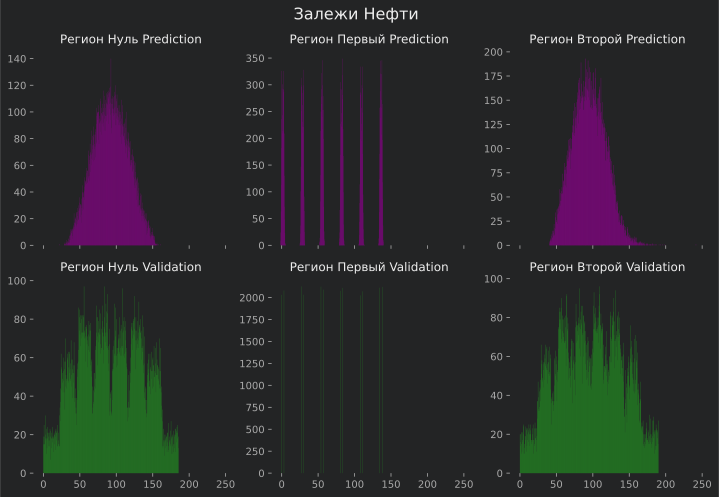

In [40]:
with mpl.rc_context(custom_params):
    fig, axs = plt.subplots(
        nrows=2,
        ncols=3,
        figsize=(
            to_px(960), to_px(720)),
        tight_layout=True,
        sharex=True,
        squeeze=False, 
    )

    n_bins = int(len(target_pred_zero) / 50)

    axs[0, 0].hist(target_pred_zero, bins=n_bins, color='darkmagenta')
    axs[0, 0].set_title('Регион Нуль Prediction')
    axs[1, 0].hist(target_valid_zero, bins=n_bins, color='forestgreen')
    axs[1, 0].set_title('Регион Нуль Validation')
    
    axs[0, 1].hist(target_pred_one, bins=n_bins, color='darkmagenta')
    axs[0, 1].set_title('Регион Первый Prediction')
    axs[1, 1].hist(target_valid_one, bins=n_bins, color='forestgreen')
    axs[1, 1].set_title('Регион Первый Validation')
    
    axs[0, 2].hist(target_pred_two, bins=n_bins, color='darkmagenta')
    axs[0, 2].set_title('Регион Второй Prediction')
    axs[1, 2].hist(target_valid_two, bins=n_bins, color='forestgreen')
    axs[1, 2].set_title('Регион Второй Validation')

    fig.suptitle('Залежи Нефти', fontsize=16)

    plt.show()

MSE (средняя квадратичная ошибка) и RMSE (квадратный корень из средней квадратичной ошибки).

MAE (англ. mean absolute error)

Коэффициент детерминации, или метрика R2 (англ. coefficient of determination; R-squared), 

> - Значение метрики R2 равно единице только в одном случае, если MSE нулевое. Такая модель предсказывает все ответы идеально.
> - R2 равно нулю: модель работает так же, как и среднее.
> - Если метрика R2 отрицательна, качество модели очень низкое.
> - Значения R2 больше единицы быть не может.

In [41]:
display(
    target_pred_zero.describe(),
    target_pred_one.describe(),
    len(target_pred_one[target_pred_one < 0].index),
    target_pred_two.describe(),
)

count    25000.000000
mean        92.638346
std         23.878052
min         22.157779
25%         75.174238
50%         92.422123
75%        109.917898
max        161.276776
dtype: float64

count    25000.000000
mean        69.188868
std         46.025039
min         -1.580345
25%         28.593035
50%         79.439679
75%        109.486952
max        139.716675
dtype: float64

516

count    25000.000000
mean        95.051469
std         22.638519
min         40.549439
25%         78.652308
50%         94.419141
75%        110.926327
max        241.722152
dtype: float64

In [42]:
target_pred_one[target_pred_one < 0] = 0

### Проанализируем результаты

- Коэффициент детерминации `r2_score` для регионов «Нуль» и «Второй» довольно низкий 0,23 и 0,16.
- А корень из квадратичной ошибки `RMSE` для регионов «Нуль» и Второй» выше чем у «Первого» региона.
- Похоже, что «Первый» регион более понятен для модели, если смотреть по r2_score.
- С другой стороны в «Первом» регионе модель предсказывает даже отрицательные значения запасов нефти..
    - В 765 из 25 000 скважен получились отрицательные значения
    - Похоже, мы задолжали нефть Земле, придётся вернуть нефть на место)

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Хороший ход мысли, построения и выводы. Пересмотри последние при изменении моделей и полученных результатов. Кстати, если там тоже окажутся долги Земле, то скорее всего можно чуть результат заменив все отрицательные значения на 0 )
</font> 

<hr/>

## Расчёт прибыли

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ❌ <br>
<font color='crimson'>
Эти предсказания нам не нужны, слишком малая выборка (явно стат отличается от региона). Используй здесь и далее предсказания на тесте (25к строк)
</font> 

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Поправил.</strong></p>
</div>

### Все ключевые значения для расчётов сохраним в отдельных переменных

In [43]:
REGION_BUDGET = 10_000 # в млн ₽
# BARREL_PRICE = 450
# BARREL_UNIT = 1_000
kilo_barrel_price  =  0.45 # в млн ₽

BEST_OIL_WELLS = 200

STUDENTS_ALPHA = 0.95
LOSS_PROB = 0.025
BOOTSTRAP_SAMPLES = 1000

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Все хорошо, но хочу обратить внимание на названия констант - по PEP-8 название констант записываются в верхнем регистре ([подробнее](https://peps.python.org/pep-0008/#constants)). А умение давать лаконичные названия переменным, которые передают её суть — целое искусство :) Старайся давай более осмысленные названия, тогда твой код можно будет читать как рассказ.

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Поправил. Теперь по ПЭПу-8)</strong></p>
</div>

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [44]:
sufficient_vol = REGION_BUDGET / BEST_OIL_WELLS / kilo_barrel_price
print(
    'Достаточный объём сырья',
    round(sufficient_vol, 5),
    'тысяч баррелей'
)

Достаточный объём сырья 111.11111 тысяч баррелей


### Сравним полученный объём сырья со средним запасом в каждом регионе

In [45]:
print('Cредний запас нефти в регионах:')
print('\t«Нуль»\t', target_pred_zero.mean(), sep='\t')
print('\t«Первый»', target_pred_one.mean(), sep='\t')
print('\t«Второй»', target_pred_two.mean(), sep='\t')

Cредний запас нефти в регионах:
	«Нуль»		92.6383456095032
	«Первый»	69.1977153999851
	«Второй»	95.05146935829902


### Выводы по этапу подготовки расчёта прибыли

В среднем залежей нефти, меньше чем ~~хотелось бы~~ достаточный объём сырья.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Верный вывод. Большинство скважин нам не подходит, поэтому мы и разрабатываем нашу модель — без нее наугад ничего не получится.
</font>

## Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [46]:
def income_pred (valid_target, pred_target):
    best_pred_wells_indx = pred_target.sort_values(
        ascending=False,
        inplace=False,
        ignore_index=False,
    )[: BEST_OIL_WELLS].index
    
    region_valid_vol = valid_target[best_pred_wells_indx].sum()
    total_income = region_valid_vol * kilo_barrel_price - REGION_BUDGET
    
    return total_income

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ❌ <br>
<font color='crimson'>
Нам нужно узнать прибыль которую мы *получим*, а не ту, что мы предскажем. Для этого надо передать в функцию еще и таргеты и по индексам отсортированных предсказаний взять реальные значения и дальнейший расчет выполнять для них. (представим что мы предсказали 500, взяли из них в работу 200 лучших скважин и потом смотрим сколько мы из них в реальности достали нефти). 
    
Также в total_income нужно учесть `бюджет на разработку скважин в регионе`, а то мы расчитываем выручку, а не прибыль
</font> 

> 4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:  

🤷‍♂️ Элеонора Гальперина приди..

> Доход с каждой единицы продукта составляет 450 тыс. рублей  

Что здесь есть доход? Учитывает он бюджет на разработку скважин или нет?  
Это риторические вопросы.  

Главное чтобы бюджет на разработку модели учитывали)

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Поправил. Теперь по ПЭПу-8)</strong></p>
</div>

### ~~Посмотрим на скважины с максимальными значениями предсказаний~~

### ~~Посмотрим на сумму предсказаний объёма нефти по регионам~~

### ~~Рассчитаем прибыль для предсказаний объёма нефти по регионам~~

<hr/>

## Посчитайте риски и прибыль для каждого региона

### Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

### Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков

In [47]:
 def bootstrap_income(reg_target_valid, reg_target_pred):
    bootstap_income = []
    # sem_income = []
    
    for i in range(BOOTSTRAP_SAMPLES):
        sample_indices = reg_target_pred.sample(
            n=500,
            replace=False,
            random_state=random_np
        ).index
        
        
        top_sample_income = income_pred(
            reg_target_valid[sample_indices],
            reg_target_pred[sample_indices]
        )
        bootstap_income.append(top_sample_income)
        # sem_income.append(subsample.sem())
        
    lower_income = np.quantile(
        a=bootstap_income,
        q=0.025,
    )
    upper_income = np.quantile(
        a=bootstap_income,
        q=0.975,
    )
    
    mean_income = np.mean(bootstap_income)
    # sem_income = np.mean(sem_income)
    
    to_return = (lower_income, mean_income, upper_income)
    
    return to_return

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ❌ <br>
<font color='crimson'>
Отлично, реализация с помощью функции, это удобно!
Есть несколько неточностей:
- Для расчета прибыли на каждом шаге бутстрепа используй ранее написанную функцию `income_pred`, передавай туда случайно выбранные 500 скважин и предсказанные таргеты, а полученную прибыль сохраняй
- Посчитай риск, ниже верно повторил из задания — *Убыток — это отрицательная прибыль* — такую проверку и примени к получившемуся массиву из 1000 значений прибыли.
</font> 

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Поправил.</strong></p>
</div>

In [48]:
# %time
low_zero, mean_zero, upper_zero = bootstrap_income(target_valid_zero, target_pred_zero)

In [49]:
low_one, mean_one, upper_one = bootstrap_income(target_valid_one, target_pred_one)

In [50]:
low_two, mean_two, upper_two = bootstrap_income(target_valid_two, target_pred_two)

In [51]:
print(
    'Среднее суммы дохода в 95% доверительном интервале по региону:'
)
print('\n«Нуль»')
print(
    f'мин\t{round(low_zero, 2): ,}',
    f'\t{round(mean_zero, 2): ,}',
    f'макс\t{round(upper_zero, 2): ,}', '',
    sep=' млн ₽\n'
)
print('\n«Первый»')
print(
    f'мин\t{round(low_one, 2): ,}',
    f'\t{round(mean_one, 2): ,}',
    f'макс\t{round(upper_one, 2): ,}', '',
    sep=' млн ₽\n'
)
print('\n«Второй»')
print(
    f'мин\t{round(low_two, 2): ,}',
    f'\t{round(mean_two, 2): ,}',
    f'макс\t{round(upper_two, 2): ,}', '',
    sep=' млн ₽\n'
)

Среднее суммы дохода в 95% доверительном интервале по региону:

«Нуль»
мин	-47.62 млн ₽
	 473.07 млн ₽
макс	 953.41 млн ₽


«Первый»
мин	 136.59 млн ₽
	 484.9 млн ₽
макс	 884.49 млн ₽


«Второй»
мин	 33.71 млн ₽
	 584.19 млн ₽
макс	 1,127.92 млн ₽



> #### Убыток — это отрицательная прибыль 

### Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор

Только в регионе «Нуль» ожидаются убытки в 95% доверительном интервале. Исключаем «Нуль».  
Среднее суммы дохода в регионе «Второй» выше чем в регионе «Первый». Исключаем «Первый».  
  
Поэтому в регионе «Второй» ожидаем подзаработать.  
Если очень повезёт будет чёрно+зотлотой миллиард ₽.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Хорошо, пересмотри вывод по результатам внесения правок
</font> 

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0">🔆</p>
</div>

<hr/>

## 

## Как будут проверять мой проект?

- Как вы готовите данные к обучению?
- Выполнили все шаги по инструкции?
- Все ли условия бизнеса учтены?
- Какие выводы об исследовании задачи делаете?
- Корректно ли выполнена процедура Bootstrap?
- Предложен ли регион для разработки скважин? Обоснован ли выбор?
- Не дублируете ли код?
- Следите ли за структурой проекта и поддерживаете ли аккуратность кода?

<font color='steelblue'><b>Итоговый комментарий ревьюера</b></font>
<font color='steelblue'>
- Алексей, в твоем проекте много хороших решений, код — достаточно лаконичный, ты делаешь достаточные комментарии в ходе работы, заканчиваешь основные главы выводами, все это помогает понять ход твоих мыслей и упрощает чтение проекта! Однако еще есть нюансы которые придется поправить (Минимум — Красные комментарии, а если хочешь прокачать проект — можно еще и часть желтых).
    
- Надеюсь, комментарии помогут закончить проект. Постараюсь повторно проверить твой проект как можно быстрее. Если у тебя появятся вопросы — задавай, я постараюсь ответить.
</font>